## Open data battle. Отборочный этап.
### Задача 1.

Дана статистика заболеваемости коронавирусом за определенный промежуток в разных странах, записанная в файл covid-19cases.csv. Необходимо:

Произвести очистку данных, убрав пустые столбцы и неинформативные строки (строки, выделенные для заметок for Notes)

Определить статистику случаев заражения в разных частях света (столбец continent) за каждый месяц

Определить корреляцию каждой части света с другой.

Вывести название части света, которая меньше всего коррелирует с другими

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv("covid-19cases.csv")

In [95]:
df.head(7)

,Unnamed: 0,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 40,Unnamed: 41,iso_code,month,year
0,0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
1,1,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
3,3,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.0,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
5,5,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,21-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0


In [96]:
df.date[1]

'For Notes: '

In [97]:
df = df[df.date != "For Notes: "]

In [98]:
df.columns

Index(['Unnamed: 0', 'date', 'continent', 'location', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'Unnamed: 40',
       'Unnamed: 41', 'iso_code', 'month', 'year

In [99]:
for i in df.columns:
    if df[i].isna().sum() > 0.5 * len(df):
        df = df.drop(i, axis = 1)
    elif df[i].isna().sum():
        print(i, df[i].isna().sum())

continent 604
total_cases 3614
new_cases 894
new_cases_smoothed 1688
total_deaths 12550
new_deaths 894
new_deaths_smoothed 1688
total_cases_per_million 3880
new_cases_per_million 958
new_cases_smoothed_per_million 1753
total_deaths_per_million 12801
new_deaths_per_million 958
new_deaths_smoothed_per_million 1753
stringency_index 8876
population 302
population_density 2750
median_age 5794
aged_65_older 6500
aged_70_older 6039
gdp_per_capita 6418
extreme_poverty 21898
cardiovasc_death_rate 5821
diabetes_prevalence 4114
female_smokers 16179
male_smokers 16650
hospital_beds_per_thousand 10450
life_expectancy 974
human_development_index 7454
iso_code 302


In [100]:
len(df), df.columns

(52873,
 Index(['Unnamed: 0', 'date', 'continent', 'location', 'total_cases',
        'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
        'new_deaths_smoothed', 'total_cases_per_million',
        'new_cases_per_million', 'new_cases_smoothed_per_million',
        'total_deaths_per_million', 'new_deaths_per_million',
        'new_deaths_smoothed_per_million', 'stringency_index', 'population',
        'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
        'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
        'diabetes_prevalence', 'female_smokers', 'male_smokers',
        'hospital_beds_per_thousand', 'life_expectancy',
        'human_development_index', 'iso_code', 'month', 'year'],
       dtype='object'))

In [101]:
continents = df.continent.dropna().unique().copy()
continents

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [103]:
df = df[["continent", "new_cases_per_million", "month", "year"]].dropna()

In [104]:
df

,continent,new_cases_per_million,month,year
0,North America,18.733,3.0,20.0
4,North America,18.733,3.0,20.0
12,North America,74.930,3.0,20.0
14,North America,46.831,3.0,20.0
16,North America,18.733,3.0,20.0
...,...,...,...,...
104530,Africa,1.817,10.0,20.0
104532,Africa,1.009,10.0,20.0
104534,Africa,0.807,10.0,20.0
104536,Africa,0.471,10.0,20.0


In [105]:
new = df.groupby(["continent", "year", "month"]).agg({"new_cases_per_million": "sum"})
new[:70]

new_cases_per_million
continent     year month                       
Africa        19.0 12.0                   0.000
              20.0 1.0                    0.000
                   2.0                    0.038
                   3.0                  418.420
                   4.0                 2899.290
...                                         ...
South America 20.0 6.0                23924.086
                   7.0                28465.333
                   8.0                40350.024
                   9.0                34350.360
                   10.0               27224.619

[66 rows x 1 columns]

In [106]:
new = new.reset_index(level="continent")
new

continent  new_cases_per_million
year month                                      
19.0 12.0          Africa                  0.000
20.0 1.0           Africa                  0.000
     2.0           Africa                  0.038
     3.0           Africa                418.420
     4.0           Africa               2899.290
...                   ...                    ...
     6.0    South America              23924.086
     7.0    South America              28465.333
     8.0    South America              40350.024
     9.0    South America              34350.360
     10.0   South America              27224.619

[66 rows x 2 columns]

In [107]:
new[new.continent == "Africa"]

continent  new_cases_per_million
year month                                 
19.0 12.0     Africa                  0.000
20.0 1.0      Africa                  0.000
     2.0      Africa                  0.038
     3.0      Africa                418.420
     4.0      Africa               2899.290
     5.0      Africa              10246.513
     6.0      Africa              13242.534
     7.0      Africa              21438.734
     8.0      Africa              19325.667
     9.0      Africa              16318.072
     10.0     Africa              18419.019

In [108]:
list(new[new.continent == continent].new_cases_per_million)

[0.0,
 0.27399999999999997,
 0.91,
 891.8149999999999,
 998.5069999999989,
 337.9070000000001,
 678.9379999999999,
 1156.7880000000014,
 7841.052999999999,
 11273.230000000003,
 26666.48799999999]

North America


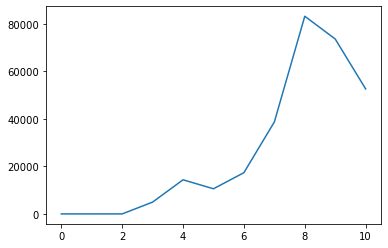

Asia


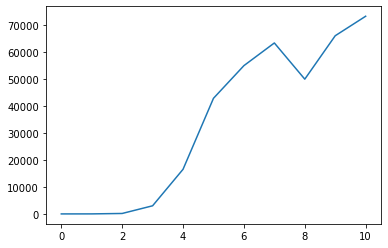

Africa


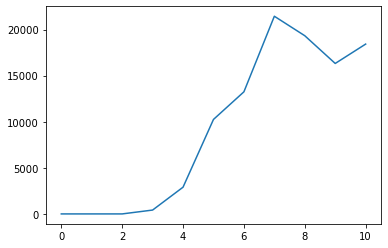

Europe


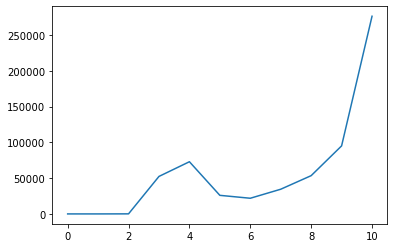

South America


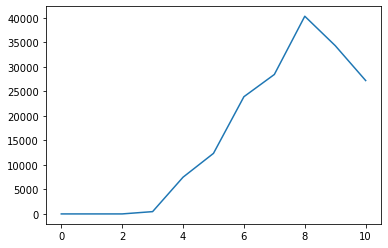

Oceania


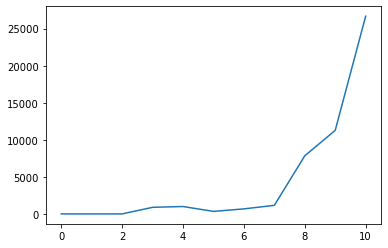

In [109]:
for continent in continents:
    print(continent)
    plt.plot(list(new[new.continent == continent].new_cases_per_million))
    plt.show()

In [110]:
d = dict()
for continent in continents:
    d[continent] = np.array(new[new.continent == continent].new_cases_per_million)
d

{'North America': array([0.0000000e+00, 1.1200000e-01, 6.1600000e-01, 4.9717020e+03,
        1.4364821e+04, 1.0587288e+04, 1.7366033e+04, 3.8717645e+04,
        8.3234435e+04, 7.3652514e+04, 5.2625534e+04]),
 'Asia': array([1.9000000e-02, 1.0637000e+01, 1.6642700e+02, 3.0111970e+03,
        1.6528222e+04, 4.2827438e+04, 5.4930565e+04, 6.3328505e+04,
        4.9920824e+04, 6.6004911e+04, 7.3226605e+04]),
 'Africa': array([0.0000000e+00, 0.0000000e+00, 3.8000000e-02, 4.1842000e+02,
        2.8992900e+03, 1.0246513e+04, 1.3242534e+04, 2.1438734e+04,
        1.9325667e+04, 1.6318072e+04, 1.8419019e+04]),
 'Europe': array([0.00000000e+00, 3.81000000e-01, 8.42600000e+01, 5.23886020e+04,
        7.29130800e+04, 2.59560660e+04, 2.18859470e+04, 3.44932630e+04,
        5.34660620e+04, 9.50522950e+04, 2.76194331e+05]),
 'South America': array([0.0000000e+00, 0.0000000e+00, 5.0000000e-03, 4.6706200e+02,
        7.4951880e+03, 1.2359838e+04, 2.3924086e+04, 2.8465333e+04,
        4.0350024e+04, 3.43

In [115]:
cases = pd.DataFrame({continent: np.array(new[new.continent == continent].new_cases_per_million) for continent in continents})
cases

,North America,Asia,Africa,Europe,South America,Oceania
0,0.000,0.019,0.000,0.000,0.000,0.000
1,0.112,10.637,0.000,0.381,0.000,0.274
2,0.616,166.427,0.038,84.260,0.005,0.910
3,4971.702,3011.197,418.420,52388.602,467.062,891.815
4,14364.821,16528.222,2899.290,72913.080,7495.188,998.507
5,10587.288,42827.438,10246.513,25956.066,12359.838,337.907
6,17366.033,54930.565,13242.534,21885.947,23924.086,678.938
7,38717.645,63328.505,21438.734,34493.263,28465.333,1156.788
8,83234.435,49920.824,19325.667,53466.062,40350.024,7841.053
9,73652.514,66004.911,16318.072,95052.295,34350.360,11273.230


In [116]:
cases.corr()

,North America,Asia,Africa,Europe,South America,Oceania
North America,1.000000,0.772462,0.833888,0.510331,0.933600,0.646884
Asia,0.772462,1.000000,0.959276,0.584264,0.908291,0.633210
Africa,0.833888,0.959276,1.000000,0.477508,0.953845,0.556587
Europe,0.510331,0.584264,0.477508,1.000000,0.436461,0.950798
South America,0.933600,0.908291,0.953845,0.436461,1.000000,0.552201
Oceania,0.646884,0.633210,0.556587,0.950798,0.552201,1.000000


In [117]:
cases.corr().sum()

North America    4.697164
Asia             4.857503
Africa           4.781103
Europe           3.959361
South America    4.784398
Oceania          4.339680
dtype: float64

In [122]:
cases.corr().sum().idxmin()

'Europe'